# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/home/fanpeng/miniconda3/envs/tf2/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Questions

## 1. 
*Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?*


No, all weights should be sampled independently; they should not all have the
same initial value. One important goal of sampling weights randomly is to break
symmetry: if all the weights have the same initial value, even if that value is not
zero, then symmetry is not broken (i.e., all neurons in a given layer are equiva‐
lent), and backpropagation will be unable to break it. Concretely, this means that
all the neurons in any given layer will always have the same weights. It’s like hav‐
ing just one neuron per layer, and much slower. It is virtually impossible for such
a configuration to converge to a good solution.

## 2. 
*Is it OK to initialize the bias terms to 0?*


It is perfectly fine to initialize the bias terms to zero. Some people like to initialize
them just like weights, and that’s okay too; it does not make much difference.

## 3. 
*Name three advantages of the SELU activation function over ReLU.*


* It can take on negative values, so the average output of the neurons in any
given layer is typically closer to zero than when using the ReLU activation
function (which never outputs negative values). This helps alleviate the vanish‐
ing gradients problem.

* It always has a nonzero derivative, which avoids the dying units issue that can
affect ReLU units.

* When the conditions are right (i.e., if the model is sequential, and the weights
are initialized using LeCun initialization, and the inputs are standardized, and
there’s no incompatible layer or regularization, such as dropout or ℓ1 regulari‐
zation), then the SELU activation function ensures the model is self-
normalized, which solves the exploding/vanishing gradients problems.

## 4. 
*In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?*


The SELU activation function is a good default. If you need the neural network to
be as fast as possible, you can use one of the leaky ReLU variants instead (e.g., a
simple leaky ReLU using the default hyperparameter value). The simplicity of the
ReLU activation function makes it many people’s preferred option, despite the
fact that it is generally outperformed by SELU and leaky ReLU. However, the
ReLU activation function’s ability to output precisely zero can be useful in some
cases (e.g., see Chapter 17). Moreover, it can sometimes benefit from optimized
implementation as well as from hardware acceleration. The hyperbolic tangent
(tanh) can be useful in the output layer if you need to output a number between
–1 and 1, but nowadays it is not used much in hidden layers (except in recurrent
nets). The logistic activation function is also useful in the output layer when you
need to estimate a probability (e.g., for binary classification), but is rarely used in
hidden layers (there are exceptions—for example, for the coding layer of varia‐
tional autoencoders; see Chapter 17). Finally, the softmax activation function is
useful in the output layer to output probabilities for mutually exclusive classes,
but it is rarely (if ever) used in hidden layers.

## 5. 
*What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?*


If you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using
an SGD optimizer, then the algorithm will likely pick up a lot of speed, hopefully
moving roughly toward the global minimum, but its momentum will carry it
right past the minimum. Then it will slow down and come back, accelerate again,
overshoot again, and so on. It may oscillate this way many times before converg‐
ing, so overall it will take much longer to converge than with a smaller momentum
value.

## 6. 
*Name three ways you can produce a sparse model.*

One way to produce a sparse model (i.e., with most weights equal to zero) is to
train the model normally, then zero out tiny weights. For more sparsity, you can
apply ℓ1 regularization during training, which pushes the optimizer toward spar‐
sity. A third option is to use the TensorFlow Model Optimization Toolkit.

## 7. 
*Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What about MC Dropout?*

Yes, dropout does slow down training, in general roughly by a factor of two.
However, it has no impact on inference speed since it is only turned on during
training. MC Dropout is exactly like dropout during training, but it is still active
during inference, so each inference is slowed down slightly. More importantly,
when using MC Dropout you generally want to run inference 10 times or more
to get better predictions. This means that making predictions is slowed down by
a factor of 10 or more.

## 8.
Practice training a deep neural network on the CIFAR10 image dataset:


*a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but
it’s the point of this exercise). Use He initialization and the ELU activation
function.*


In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation='elu',
                                 kernel_initializer='he_normal'))

2024-02-06 21:41:32.511223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-06 21:41:32.615660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-06 21:41:32.616158: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-06 21:41:32.619361: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

*b. Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax out‐
put layer with 10 neurons. Remember to search for the right learning rate each
time you change the model’s architecture or hyperparameters.*


In [3]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_cifar10_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', 'run_{:03d}'.format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [8]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [9]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 24s 14ms/step - loss: 4.1806 - accuracy: 0.1608 - val_loss: 2.1614 - val_accuracy: 0.2166
Epoch 2/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.0797 - accuracy: 0.2466 - val_loss: 2.1769 - val_accuracy: 0.2202
Epoch 3/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.9436 - accuracy: 0.2895 - val_loss: 2.1861 - val_accuracy: 0.2178
Epoch 4/100
1407/1407 [==============================] - 23s 17ms/step - loss: 1.8564 - accuracy: 0.3224 - val_loss: 1.8606 - val_accuracy: 0.3248
Epoch 5/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7880 - accuracy: 0.3516 - val_loss: 1.8212 - val_accuracy: 0.3320
Epoch 6/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7348 - accuracy: 0.3717 - val_loss: 1.7786 - val_accuracy: 0.3562
Epoch 7/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6930 - accuracy: 0.3882 - val_loss: 1

In [10]:
model = keras.models.load_model('my_cifar10_model.h5')
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5250 - accuracy: 0.4548


[1.5249603986740112, 0.454800009727478]

*c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it
affect training speed?*

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 56s 33ms/step - loss: 1.8425 - accuracy: 0.3395 - val_loss: 1.6721 - val_accuracy: 0.4078
Epoch 2/100
1407/1407 [==============================] - 51s 36ms/step - loss: 1.6712 - accuracy: 0.4025 - val_loss: 1.5720 - val_accuracy: 0.4352
Epoch 3/100
1407/1407 [==============================] - 53s 37ms/step - loss: 1.5979 - accuracy: 0.4318 - val_loss: 1.5345 - val_accuracy: 0.4482
Epoch 4/100
1407/1407 [==============================] - 53s 38ms/step - loss: 1.5467 - accuracy: 0.4484 - val_loss: 1.4814 - val_accuracy: 0.4720
Epoch 5/100
1407/1407 [==============================] - 54s 38ms/step - loss: 1.5025 - accuracy: 0.4669 - val_loss: 1.4358 - val_accuracy: 0.4880
Epoch 6/100
1407/1407 [==============================] - 54s 39ms/step - loss: 1.4639 - accuracy: 0.4790 - val_loss: 1.4410 - val_accuracy: 0.4816
Epoch 7/100
1407/1407 [==============================] - 55s 39ms/step - loss: 1.4328 - accuracy: 0.4916 - val_loss: 1

[1.3205736875534058, 0.5442000031471252]

*d. Try replacing Batch Normalization with SELU, and make the necessary adjust‐
ements to ensure the network self-normalizes (i.e., standardize the input fea‐
tures, use LeCun normal initialization, make sure the DNN contains only a
sequence of dense layers, etc.).*

In [12]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, 
                                 kernel_initializer='lecun_normal',
                                 activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 34s 22ms/step - loss: 1.9415 - accuracy: 0.3041 - val_loss: 1.8389 - val_accuracy: 0.3416
Epoch 2/100
1407/1407 [==============================] - 31s 22ms/step - loss: 1.7172 - accuracy: 0.3894 - val_loss: 1.7813 - val_accuracy: 0.3446
Epoch 3/100
1407/1407 [==============================] - 31s 22ms/step - loss: 1.6204 - accuracy: 0.4284 - val_loss: 1.6473 - val_accuracy: 0.4196
Epoch 4/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5495 - accuracy: 0.4554 - val_loss: 1.6194 - val_accuracy: 0.4412
Epoch 5/100
1407/1407 [==============================] - 29s 21ms/step - loss: 1.4962 - accuracy: 0.4772 - val_loss: 1.5726 - val_accuracy: 0.4472
Epoch 6/100
1407/1407 [==============================] - 29s 21ms/step - loss: 1.4496 - accuracy: 0.4920 - val_loss: 1.5565 - val_accuracy: 0.4498
Epoch 7/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.4067 - accuracy: 0.5084 - val_loss: 1

[1.459917426109314, 0.515999972820282]

*e. Try regularizing the model with alpha dropout. Then, without retraining your
model, see if you can achieve better accuracy using MC Dropout.*

In [13]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 32s 20ms/step - loss: 1.8903 - accuracy: 0.3285 - val_loss: 1.7161 - val_accuracy: 0.4006
Epoch 2/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.6582 - accuracy: 0.4135 - val_loss: 1.6372 - val_accuracy: 0.4164
Epoch 3/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5671 - accuracy: 0.4477 - val_loss: 1.6060 - val_accuracy: 0.4336
Epoch 4/100
1407/1407 [==============================] - 33s 23ms/step - loss: 1.4998 - accuracy: 0.4745 - val_loss: 1.5823 - val_accuracy: 0.4560
Epoch 5/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.4437 - accuracy: 0.4974 - val_loss: 1.5551 - val_accuracy: 0.4670
Epoch 6/100
1407/1407 [==============================] - 30s 22ms/step - loss: 1.3959 - accuracy: 0.5129 - val_loss: 1.5611 - val_accuracy: 0.4550
Epoch 7/100
1407/1407 [==============================] - 33s 24ms/step - loss: 1.3549 - accuracy: 0.5285 - val_loss: 1

[1.4977052211761475, 0.48500001430511475]

The model reaches 48.9% accuracy on the validation set. That's very slightly better than without dropout (47.6%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

Let's use MC Dropout now. We will need the `MCAlphaDropout` class we used earlier, so let's just copy it here for convenience:

In [14]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Now let's create a new model, identical to the one we just trained (with the same weights), but with `MCAlphaDropout` dropout layers instead of `AlphaDropout` layers:

In [15]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [16]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [17]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4842

We get no accuracy improvement in this case (we're still at 48.9% accuracy).

So the best model we got in this exercise is the Batch Normalization model.

*f. Retrain your model using 1cycle scheduling and see if it improves training
speed and model accuracy.*

In [21]:
import math

In [22]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [25]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.1381


(9.999999747378752e-06,
 9.615227699279785,
 2.6116039752960205,
 4.002283300672259)

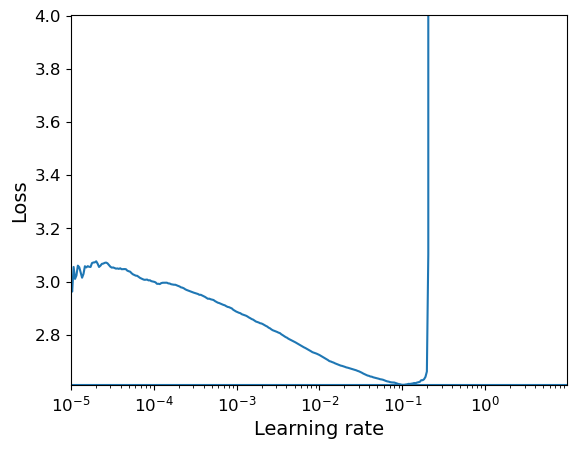

In [24]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [26]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [27]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 47.6% to 52.0%). The batch normalized model reaches a slightly better performance (54%), but it's much slower to train.